In [1]:
import pandas as pd

In [2]:
user_df = pd.read_csv("users.csv")
item_df = pd.read_csv("items.csv")
event_df = pd.read_csv("events.csv")

### Events

In [7]:
event_df['event_type'].value_counts()

event_type
play        2529
complete     770
pause        509
like         474
skip         470
save         248
Name: count, dtype: int64

In [8]:
event_df

,user_id,item_id,event_type,watch_seconds,timestamp
0,u207,i3,play,490,2025-01-10T19:24:00
1,u47,i148,like,2221,2025-01-07T04:03:00
2,u48,i109,like,1007,2025-02-11T15:20:00
3,u41,i240,play,844,2025-01-08T10:53:00
4,u78,i108,complete,2056,2025-01-17T00:11:00
...,...,...,...,...,...
4995,u130,i198,complete,3127,2025-01-03T21:34:00
4996,u158,i143,complete,438,2025-01-14T05:51:00
4997,u196,i151,skip,20,2025-01-31T19:11:00
4998,u132,i233,like,737,2025-01-14T13:43:00


In [21]:
event_df['timestamp'] = pd.to_datetime(event_df['timestamp'])
event_df = event_df.sort_values(by='timestamp')

In [23]:
event_df[event_df['user_id'] == 'u15']

,user_id,item_id,event_type,watch_seconds,timestamp
4800,u15,i19,play,2151,2025-01-01 00:01:00
313,u15,i198,play,425,2025-01-01 03:55:00
2015,u15,i30,save,30,2025-01-01 23:49:00
2867,u15,i249,play,331,2025-01-03 22:36:00
1782,u15,i115,skip,13,2025-01-10 09:45:00
166,u15,i224,complete,544,2025-01-10 16:41:00
4463,u15,i96,like,1170,2025-01-17 23:10:00
1798,u15,i113,play,1508,2025-01-25 01:46:00
3980,u15,i194,complete,364,2025-01-26 03:01:00
3424,u15,i3,play,1412,2025-01-26 14:17:00


### Items

In [9]:
item_df

,item_id,title,content_type,genre
0,i1,Crash Landing on You,series,romance
1,i2,Start-Up,series,drama
2,i3,Hospital Playlist,series,drama
3,i4,Reply 1988,series,family
4,i5,Extraordinary Attorney Woo,series,drama
...,...,...,...,...
255,i256,Diary Pacar Ghosting S1E6,microdrama,romance
256,i257,Kisah Cinta di Kafe S3E2,microdrama,romance
257,i258,Avengers: Infinity War Part 2,movie,action
258,i259,Captain America: Civil War Part 2,movie,action


In [10]:
item_df['content_type'].value_counts()

content_type
series        115
movie          91
microdrama     35
tv             19
Name: count, dtype: int64

### User

In [12]:
user_df

,user_id,name,age,gender,region
0,u1,Sari Hidayat,55,F,Bandung
1,u2,Ahmad Wijaya,19,M,Denpasar
2,u3,Joko Wijaya,15,F,Surabaya
3,u4,Wahyu Wijaya,41,F,Medan
4,u5,Idris Setiawan,17,M,Jakarta
...,...,...,...,...,...
215,u216,Farah Hidayat,44,M,Yogyakarta
216,u217,Qori Setiawan,20,F,Medan
217,u218,Sari Putri,41,F,Medan
218,u219,Qori Saputra,44,F,Makassar


<Axes: ylabel='Frequency'>

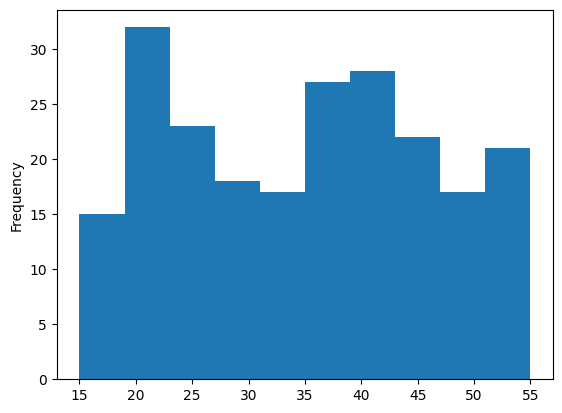

In [14]:
user_df['age'].plot(kind='hist')

In [15]:
user_df['gender'].value_counts()

gender
F    116
M    104
Name: count, dtype: int64

In [18]:
user_df['region'].value_counts()

region
Surabaya      37
Medan         37
Jakarta       33
Yogyakarta    31
Denpasar      31
Makassar      27
Bandung       24
Name: count, dtype: int64

### Joined

In [39]:
df_merged = pd.merge(
    event_df, 
    user_df, 
    on='user_id', 
    how='left'
)

df_final = pd.merge(
    df_merged, 
    item_df, 
    on='item_id', 
    how='left'
)

df_final = df_final.drop(['name', 'title'], axis=1).reset_index()

In [41]:
df_final.to_csv("df_final.csv", index=False)

In [42]:
df_final

,index,user_id,item_id,event_type,watch_seconds,timestamp,age,gender,region,content_type,genre
0,0,u15,i19,play,2151,2025-01-01 00:01:00,25,F,Bandung,movie,romance
1,1,u187,i231,skip,13,2025-01-01 00:12:00,18,F,Medan,series,drama
2,2,u109,i58,play,479,2025-01-01 00:16:00,38,F,Medan,series,anime
3,3,u106,i15,play,2659,2025-01-01 00:41:00,53,F,Jakarta,movie,romance
4,4,u60,i85,skip,19,2025-01-01 01:18:00,31,M,Surabaya,movie,romance
...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,u104,i145,complete,1813,2025-03-01 23:05:00,16,M,Denpasar,movie,action
4996,4996,u148,i32,play,3307,2025-03-01 23:10:00,26,M,Makassar,movie,action
4997,4997,u162,i204,complete,2309,2025-03-01 23:30:00,18,M,Bandung,movie,romance
4998,4998,u115,i233,like,992,2025-03-01 23:39:00,30,M,Surabaya,movie,action


In [52]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# ==========================================
# STEP 1: SIAPKAN DATA (Data Preparation)
# ==========================================
print("--- STEP 1: LOAD & PREPARE DATA ---")
df = pd.read_csv('df_final.csv')

# Kita bikin skor 'rating' buatan (Implicit Rating)
# 5 = Suka Banget (Like/Complete)
# 3 = Lumayan (Play > 60 detik)
# 1 = Cuma intip (Play < 60 detik / Skip)
def hitung_skor(baris):
    event = baris['event_type']
    durasi = baris['watch_seconds']
    
    if event in ['like', 'complete', 'save']:
        return 5.0
    elif event == 'play' and durasi > 60:
        return 3.0
    else:
        return 1.0

df['rating'] = df.apply(hitung_skor, axis=1)

# Agregasi: Ambil rating tertinggi per user-item (jaga-jaga ada duplikat)
# Kita juga simpan info age, genre, content_type untuk dipakai nanti
df_clean = df.groupby(['user_id', 'item_id', 'age', 'content_type', 'genre'])['rating'].max().reset_index()

print(f"Data siap! Jumlah baris interaksi bersih: {len(df_clean)}")
# Contoh: u15 | i19 | 25 | movie | romance | 3.0

--- STEP 1: LOAD & PREPARE DATA ---
Data siap! Jumlah baris interaksi bersih: 4783


In [56]:
df_clean

,user_id,item_id,age,content_type,genre,rating
0,u1,i100,55,series,thriller,5.0
1,u1,i118,55,movie,action,5.0
2,u1,i124,55,series,anime,3.0
3,u1,i139,55,series,anime,1.0
4,u1,i155,55,series,romance,3.0
...,...,...,...,...,...,...
4778,u99,i5,53,series,drama,3.0
4779,u99,i57,53,series,family,1.0
4780,u99,i64,53,series,anime,3.0
4781,u99,i68,53,microdrama,drama,5.0


In [54]:
# ==========================================
# STEP 2: MEMBUAT MATRIKS USER x ITEM
# ==========================================
print("\n--- STEP 2: BUAT MATRIKS INTERAKSI ---")
# Baris = User ID, Kolom = Item ID, Isi = Rating
# Kalau belum pernah nonton, isinya 0
matrix_interaksi = df_clean.pivot(index='user_id', columns='item_id', values='rating').fillna(0)

# Simpan list user dan item biar gampang dicari index-nya nanti
list_users = matrix_interaksi.index.tolist()
list_items = matrix_interaksi.columns.tolist()

print(f"Ukuran Matriks: {matrix_interaksi.shape} (Users x Items)")


--- STEP 2: BUAT MATRIKS INTERAKSI ---
Ukuran Matriks: (220, 260) (Users x Items)


In [55]:
matrix_interaksi

item_id,i1,i10,i100,i101,i102,i103,i104,i105,i106,i107,...,i90,i91,i92,i93,i94,i95,i96,i97,i98,i99
user_id,,,,,,,,,,,,,,,,,,,,,
u1,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
u10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
u100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
u101,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,3.0
u102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
u95,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
u96,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
u97,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# ==========================================
# STEP 3: HITUNG KEMIRIPAN (SIMILARITY)
# ==========================================
print("\n--- STEP 3: HITUNG SIMILARITY (Interaksi + Umur) ---")

# A. Kemiripan Interaksi (Cosine Similarity)
# Semakin mirip pola tontonan user A dan B, skor mendekati 1.0
sim_interaksi = cosine_similarity(matrix_interaksi)

# B. Kemiripan Umur (Demographic Similarity)
# Kita ambil data umur tiap user, urutkan sesuai urutan di matriks
user_age_map = df_clean[['user_id', 'age']].drop_duplicates().set_index('user_id')
umur_users = user_age_map.reindex(list_users)['age'].values

# Hitung selisih umur antar semua pasangan user
# Reshape jadi matriks kolom dan baris biar bisa dikurangin (Broadcasting numpy)
umur_col = umur_users.reshape(-1, 1) 
umur_row = umur_users.reshape(1, -1)
selisih_umur = np.abs(umur_col - umur_row)

# Rumus: 1 / (1 + selisih/10) -> Kalau seumuran skor 1.0, beda jauh skor turun
sim_umur = 1 / (1 + (selisih_umur / 10.0))

# C. Gabungkan Keduanya (Hybrid Similarity)
# Kita kasih bobot: 70% Perilaku, 30% Demografi
sim_final = (0.7 * sim_interaksi) + (0.3 * sim_umur)

print("Matriks Similarity Selesai!")


--- STEP 3: HITUNG SIMILARITY (Interaksi + Umur) ---
Matriks Similarity Selesai!


In [73]:
pd.DataFrame(sim_final)

,0,1,2,3,4,5,6,7,8,9,...,210,211,212,213,214,215,216,217,218,219
0,1.000000,0.213466,0.228913,0.174691,0.230769,0.136364,0.061224,0.151840,0.263414,0.176917,...,0.173158,0.218743,0.140710,0.187229,0.118293,0.097577,0.115385,0.292226,0.068773,0.380700
1,0.213466,1.000000,0.136364,0.275646,0.230769,0.199488,0.069767,0.145328,0.214286,0.260040,...,0.170629,0.217117,0.098076,0.282546,0.075000,0.103448,0.150000,0.248275,0.098718,0.257639
2,0.228913,0.136364,1.000000,0.317281,0.183717,0.208680,0.106520,0.243200,0.188061,0.200215,...,0.293268,0.378013,0.120000,0.237735,0.117127,0.232707,0.266205,0.186875,0.194306,0.157939
3,0.174691,0.275646,0.317281,1.000000,0.253714,0.306370,0.125050,0.209488,0.281150,0.364245,...,0.264605,0.280383,0.153972,0.356119,0.139285,0.178760,0.287395,0.167201,0.204580,0.188396
4,0.230769,0.230769,0.183717,0.253714,1.000000,0.157895,0.117026,0.156702,0.373335,0.228864,...,0.202811,0.189579,0.101604,0.196043,0.069767,0.236104,0.130435,0.304397,0.147243,0.306659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,0.097577,0.103448,0.232707,0.178760,0.236104,0.160010,0.217540,0.255944,0.210150,0.219916,...,0.202362,0.266185,0.208596,0.170518,0.181894,1.000000,0.182333,0.280578,0.199787,0.093286
216,0.115385,0.150000,0.266205,0.287395,0.130435,0.271556,0.199615,0.237813,0.229398,0.214286,...,0.272727,0.272727,0.111111,0.250670,0.100000,0.182333,1.000000,0.185409,0.197448,0.168150
217,0.292226,0.248275,0.186875,0.167201,0.304397,0.193863,0.075940,0.186856,0.367729,0.235315,...,0.221763,0.150191,0.125407,0.150000,0.130214,0.280578,0.185409,1.000000,0.085717,0.302115
218,0.068773,0.098718,0.194306,0.204580,0.147243,0.090909,0.214286,0.186011,0.182364,0.128731,...,0.191097,0.181425,0.324434,0.142498,0.280152,0.199787,0.197448,0.085717,1.000000,0.152047


In [78]:
# ==========================================
# STEP 4: CARI REKOMENDASI (Logic Inti)
# ==========================================
# Misal: Kita mau cari rekomendasi buat User 'u15' yang mau nonton 'movie'
TARGET_USER = 'u15'
TARGET_TYPES = ['movie'] 

print(f"\n--- STEP 4: GENERATE REKOMENDASI BUAT {TARGET_USER} ---")

# A. Cek Genre Favorit User (Heuristic buat Boosting)
history_user = df_clean[df_clean['user_id'] == TARGET_USER]
genre_favorit = history_user.groupby('genre')['rating'].sum().idxmax()
print(f"Genre Favorit {TARGET_USER}: {genre_favorit}")

# B. Cari User Lain yang Paling Mirip (Nearest Neighbors)
idx_target = list_users.index(TARGET_USER)
skor_kemiripan_semua = sim_final[idx_target]

# Urutkan dari skor tertinggi ke terendah
# argsort mengembalikan index, kita balik pakai [::-1] biar descending
urutan_index = np.argsort(skor_kemiripan_semua)[::-1]

# Ambil Top 10 Tetangga (Index ke-1 s.d 11, karena ke-0 adalah diri sendiri)
top_tetangga_indices = urutan_index[1:11] 

# C. Kumpulkan Barang (Item) dari Tetangga
kandidat_items = {} # Dict buat simpan {item_id: total_skor}
items_yg_sudah_ditonton = set(history_user['item_id'].tolist())

# Map ID ke Info Item (biar cepat akses genre/tipe)
item_info_map = df_clean[['item_id', 'content_type', 'genre']].drop_duplicates('item_id').set_index('item_id').to_dict('index')

for i in top_tetangga_indices:
    nama_tetangga = list_users[i]
    skor_mirip = skor_kemiripan_semua[i]
    
    # Ambil rating dari tetangga tersebut (row di matriks)
    row_tetangga = matrix_interaksi.iloc[i]
    
    # Ambil cuma barang yang ratingnya > 0 (pernah ditonton tetangga)
    items_tetangga = row_tetangga[row_tetangga > 0].index.tolist()
    
    for item in items_tetangga:
        # FILTER 1: Jangan rekomendasiin barang yang udah ditonton target user
        if item in items_yg_sudah_ditonton:
            continue
            
        # FILTER 2: Cek Tipe Konten (Cuma mau Movie)
        info = item_info_map.get(item)
        if info['content_type'] not in TARGET_TYPES:
            continue
            
        # HITUNG SKOR: Kemiripan User * Rating Item
        rating_tetangga = row_tetangga[item]
        skor_item = skor_mirip * rating_tetangga
        
        # BOOSTING: Kalau genrenya favorit user, skor naik 20%
        if info['genre'] == genre_favorit:
            skor_item = skor_item * 1.2
            
        # Masukkan ke kandidat (Akumulasi skor kalau direkomendasikan banyak tetangga)
        if item not in kandidat_items:
            kandidat_items[item] = 0
        kandidat_items[item] += skor_item


--- STEP 4: GENERATE REKOMENDASI BUAT u15 ---
Genre Favorit u15: romance


np.float64(0.35372931904402366)

In [77]:
kandidat_items

{'i126': np.float64(2.7108217237785763),
 'i13': np.float64(1.510426583520952),
 'i142': np.float64(4.556033911293416),
 'i158': np.float64(1.510426583520952),
 'i188': np.float64(4.0235860163859245),
 'i233': np.float64(2.0978146993346556),
 'i242': np.float64(3.8041767709539602),
 'i182': np.float64(0.49329817885305116),
 'i55': np.float64(1.233245447132628),
 'i76': np.float64(4.997376822228526),
 'i47': np.float64(1.1750612781683833),
 'i135': np.float64(2.349183692445197),
 'i146': np.float64(1.1745918462225986),
 'i149': np.float64(1.9576530770376643),
 'i22': np.float64(0.763785295276404),
 'i25': np.float64(0.39153061540753287),
 'i107': np.float64(1.1554627902307615),
 'i122': np.float64(1.3865553482769137),
 'i138': np.float64(1.1554627902307615),
 'i56': np.float64(1.9257713170512691),
 'i187': np.float64(3.0011103004468236),
 'i28': np.float64(1.855999040256416),
 'i97': np.float64(1.1398369011024674),
 'i131': np.float64(0.3722546798688712),
 'i136': np.float64(2.197458383

In [67]:
# ==========================================
# STEP 5: OUTPUT FINAL
# ==========================================
print("\n--- STEP 5: HASIL REKOMENDASI ---")
# Urutkan berdasarkan skor tertinggi
rekomendasi_final = sorted(kandidat_items.items(), key=lambda x: x[1], reverse=True)

# Tampilkan Top 5
for rank, (item_id, skor) in enumerate(rekomendasi_final[:5], 1):
    info = item_info_map[item_id]
    judul_palsu = f"The {info['genre'].capitalize()} {info['content_type'].capitalize()}"
    print(f"#{rank} {judul_palsu} ({item_id})")
    print(f"   Genre: {info['genre']} | Skor AI: {skor:.4f}")


--- STEP 5: HASIL REKOMENDASI ---
#1 The Thriller Movie (i76)
   Genre: thriller | Skor AI: 4.9974
#2 The Action Movie (i142)
   Genre: action | Skor AI: 4.5560
#3 The Family Movie (i188)
   Genre: family | Skor AI: 4.0236
#4 The Comedy Movie (i242)
   Genre: comedy | Skor AI: 3.8042
#5 The Comedy Movie (i187)
   Genre: comedy | Skor AI: 3.0011
